
#**Introducción**
Como parte del curso *Data Science: probando relaciones con regresión lineal*, utilizaremos este dataset de una planta de energía para crear un modelo de regresión lineal que prediga el consumo de energía (PE) a partir de las siguientes variables

*   V (Velocidad del viento)
*   AP (Presión atmosférica)
*   AT (Temperatura ambiente)
*   RH (Humedad relativa)


# Desarrollo

### Exploración de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/usina.csv')
df.sample(5)

,AT,V,AP,RH,PE
7037,8.27,35.77,1015.30,73.36,478.13
8201,6.71,40.72,1022.78,80.69,483.11
695,16.64,53.82,1015.13,68.24,459.01
5758,7.40,40.72,1022.56,87.67,484.29
2805,29.79,77.17,1009.68,64.00,432.84


La función sns.pairplot(datos) se utiliza para crear una matriz de gráficos de dispersión e histogramas que permiten visualizar rápidamente:

1. Relaciones entre variables

2. Distribuciones individuales

3. Multicolinealidad

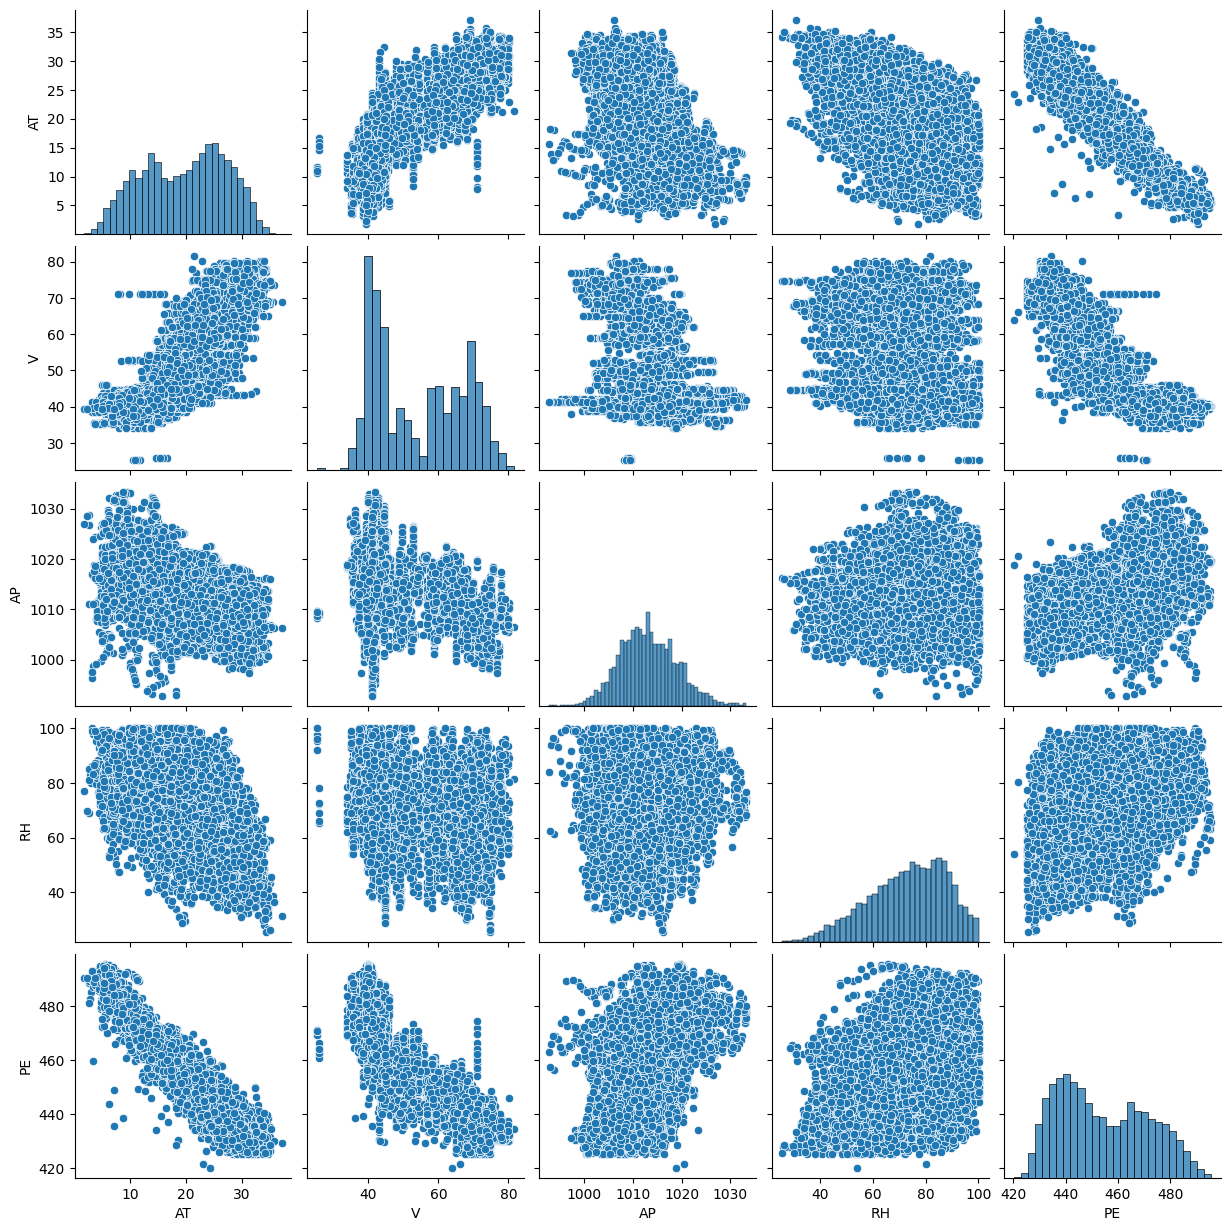

In [ ]:
sns.pairplot(df)

### Creación de modelos de regresión lineal

In [ ]:
y = df['PE']
X = df.drop(columns=['PE'])

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split
y = df['PE']
x = df.drop(columns = 'PE')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train= sm.add_constant(X_train)

In [ ]:
# Modelo 0 con todas las variables disponibles
modelo_0 = sm.OLS(y_train,X_train).fit()

In [ ]:
# Modelo 1 sin AP y AT
modelo_1 = sm.OLS(y_train, X_train[['V', 'RH',]]).fit()

In [ ]:
# Modelo 2 sin sin RH y V
modelo_2 = sm.OLS(y_train, X_train[['AT','AP']]).fit()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Resumen del modelos
modelos = [modelo_0, modelo_1, modelo_2]
for i, j in enumerate(modelos):
  print(f'El modelo {i} tiene el siguiente resumen:')
  print(j.summary(), '\n\n')
  print()

El modelo 0 tiene el siguiente resumen:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Tue, 29 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:12:16   Log-Likelihood:                -19662.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.937e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

## Análisis de los modelos
Verificando la multicolinealidad utilizando el concepto de VIF, que mide cuánto aumenta la varianza de los coeficientes debido a correlaciones entre predictores.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:

explicativas_0 = ['AT', 'V', 'AP', 'RH']
explicativas_1 = ['V', 'RH']
explicativas_2 = ['AT', 'AP']


In [ ]:
vif_0 = pd.DataFrame()
vif_0["variavle"] = explicativas_0

vif_0["vif"] = [variance_inflation_factor(X_train[explicativas_0].values, i)
                          for i in range(len(explicativas_0))]

print(vif_0)

  variavle        vif
0       AT  39.241893
1        V  75.254708
2       AP  66.054203
3       RH  40.759650


Los Factores de Inflación de Varianza dle modelo 0 son mayores que 30, indicando multicolinealidad severa, es decir, los coeficientes son poco confiables.

In [ ]:
vif_1 = pd.DataFrame()
vif_1["variable"] = explicativas_1

vif_1["vif"] = [variance_inflation_factor(X_train[explicativas_1].values, i)
                          for i in range(len(explicativas_1))]

print(vif_1)

  variable       vif
0        V  8.768934
1       RH  8.768934


In [ ]:
vif_2 = pd.DataFrame()
vif_2["variable"] = explicativas_2

vif_2["vif"] = [variance_inflation_factor(X_train[explicativas_2].values, i)
                          for i in range(len(explicativas_2))]

print(vif_2)

  variable       vif
0       AT  7.804893
1       AP  7.804893


Observamos que el modelo 2 tiene mejor desempeño, AT y AP cayeron a 7.8, niveles seguros, un VIF < 10 indica que la multicolinealidad ya no es problemática para estas variables.

### Análisis de residuos

In [ ]:
import plotly.express as px

In [ ]:
y_previsto_train2 =  modelo_2.predict(X_train[['AT','AP']])

In [ ]:
fig = px.scatter(x=y_previsto_train2, y=y_train,
                 title='Previsión X Real',
                 labels={'x':'Precio previsto','y':'Precio real'})
fig.show()

In [ ]:
residuos_2 = modelo_2.resid


In [ ]:
fig = px.scatter(x=y_previsto_train2, y=residuos_2,
                 title='Previsió X Real',
                 labels={'x':'Precio previsto','y':'Residuos'})
fig.show()

## Conclusión
El Modelo 2 es mejor para predicción porque tiene residuos ≈ 0 y valores de VIF bajos, es decir, correlación moderada entre predictores, pero dentro de un rango aceptable.

Además, no hay heterocedasticidad en los datos.